# London Housing Case Study - Tier 3 Complete

## Objectives
Hey! Great job getting through those challenging DataCamp courses. You're learning a lot in a short span of time. 

In this notebook, you're going to apply the skills you've been learning, bridging the gap between the controlled environment of DataCamp and the *slightly* messier work that data scientists do with actual datasets!

Here’s the mystery we’re going to solve: ***which boroughs of London have seen the greatest increase in housing prices, on average, over the last two decades?***


A borough is just a fancy word for district. You may be familiar with the five boroughs of New York… well, there are 32 boroughs within Greater London [(here's some info for the curious)](https://en.wikipedia.org/wiki/London_boroughs). Some of them are more desirable areas to live in, and the data will reflect that with a greater rise in housing prices.

***This is the Tier 3 notebook, which means it's not filled in at all: we'll just give you the skeleton of a project, the brief and the data. It's up to you to play around with it and see what you can find out! Good luck! If you struggle, feel free to look at easier tiers for help; but try to dip in and out of them, as the more independent work you do, the better it is for your learning!***

This challenge will make use of only what you learned in the following DataCamp courses: 
- Prework courses (Introduction to Python for Data Science, Intermediate Python for Data Science)
- Data Types for Data Science
- Python Data Science Toolbox (Part One) 
- pandas Foundations
- Manipulating DataFrames with pandas
- Merging DataFrames with pandas

Of the tools, techniques and concepts in the above DataCamp courses, this challenge should require the application of the following: 
- **pandas**
    - **data ingestion and inspection** (pandas Foundations, Module One) 
    - **exploratory data analysis** (pandas Foundations, Module Two)
    - **tidying and cleaning** (Manipulating DataFrames with pandas, Module Three) 
    - **transforming DataFrames** (Manipulating DataFrames with pandas, Module One)
    - **subsetting DataFrames with lists** (Manipulating DataFrames with pandas, Module One) 
    - **filtering DataFrames** (Manipulating DataFrames with pandas, Module One) 
    - **grouping data** (Manipulating DataFrames with pandas, Module Four) 
    - **melting data** (Manipulating DataFrames with pandas, Module Three) 
    - **advanced indexing** (Manipulating DataFrames with pandas, Module Four) 
- **matplotlib** (Intermediate Python for Data Science, Module One)
- **fundamental data types** (Data Types for Data Science, Module One) 
- **dictionaries** (Intermediate Python for Data Science, Module Two)
- **handling dates and times** (Data Types for Data Science, Module Four)
- **function definition** (Python Data Science Toolbox - Part One, Module One)
- **default arguments, variable length, and scope** (Python Data Science Toolbox - Part One, Module Two) 
- **lambda functions and error handling** (Python Data Science Toolbox - Part One, Module Four) 

## The Data Science Pipeline

This is Tier Three, so we'll get you started. But after that, it's all in your hands! When you feel done with your investigations, look back over what you've accomplished, and prepare a quick presentation of your findings for the next mentor meeting. 

Data Science is magical. In this case study, you'll get to apply some complex machine learning algorithms. But as  [David Spiegelhalter](https://www.youtube.com/watch?v=oUs1uvsz0Ok) reminds us, there is no substitute for simply **taking a really, really good look at the data.** Sometimes, this is all we need to answer our question.

Data Science projects generally adhere to the four stages of Data Science Pipeline:
1. Sourcing and loading 
2. Cleaning, transforming, and visualizing 
3. Modeling 
4. Evaluating and concluding 


### 1. Sourcing and Loading 

Any Data Science project kicks off by importing  ***pandas***. The documentation of this wonderful library can be found [here](https://pandas.pydata.org/). As you've seen, pandas is conveniently connected to the [Numpy](http://www.numpy.org/) and [Matplotlib](https://matplotlib.org/) libraries. 

***Hint:*** This part of the data science pipeline will test those skills you acquired in the pandas Foundations course, Module One. 

#### 1.1. Importing Libraries

In [360]:
# Let's import the pandas, numpy libraries as pd, and np respectively. 
import pandas as pd

# Load the pyplot collection of functions from matplotlib, as plt 
import matplotlib.pyplot as plt
from datetime import datetime
import datetime
from collections import counter

ImportError: cannot import name 'counter' from 'collections' (C:\Users\sherry.thompson\Anaconda3\lib\collections\__init__.py)

#### 1.2.  Loading the data
Your data comes from the [London Datastore](https://data.london.gov.uk/): a free, open-source data-sharing portal for London-oriented datasets. 

In [ ]:
# First, make a variable called url_LondonHousePrices, and assign it the following link, enclosed in quotation-marks as a string:
# https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls

url_LondonHousePrices = "https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls"

# The dataset we're interested in contains the Average prices of the houses, and is actually on a particular sheet of the Excel file. 
# As a result, we need to specify the sheet name in the read_excel() method.
# Put this data into a variable called properties.  
properties = pd.read_excel(url_LondonHousePrices, sheet_name='Average price', index_col= None)

### 2. Cleaning, transforming, and visualizing
This second stage is arguably the most important part of any Data Science project. The first thing to do is take a proper look at the data. Cleaning forms the majority of this stage, and can be done both before or after Transformation.

The end goal of data cleaning is to have tidy data. When data is tidy: 

1. Each variable has a column.
2. Each observation forms a row.

Keep the end goal in mind as you move through this process, every step will take you closer. 



***Hint:*** This part of the data science pipeline should test those skills you acquired in: 
- Intermediate Python for data science, all modules.
- pandas Foundations, all modules. 
- Manipulating DataFrames with pandas, all modules.
- Data Types for Data Science, Module Four.
- Python Data Science Toolbox - Part One, all modules

**2.1. Exploring your data** 

Think about your pandas functions for checking out a dataframe. 

In [ ]:
properties.info()
properties.shape
print(properties.head())
properties.columns
properties.index

**2.2. Cleaning the data**

You might find you need to transpose your dataframe, check out what its row indexes are, and reset the index. You  also might find you need to assign the values of the first row to your column headings  . (Hint: recall the .columns feature of DataFrames, as well as the iloc[] method).

Don't be afraid to use StackOverflow for help  with this.

In [ ]:
properties_clean = properties.transpose().reset_index()
properties_clean.columns = properties_clean.iloc[0]

**2.3. Cleaning the data (part 2)**

You might we have to **rename** a couple columns. How do you do this? The clue's pretty bold...

In [ ]:
properties_clean.rename(columns={'Unnamed: 0': 'borough', pd.NaT: 'b_no'}, inplace=True)
mapper = lambda x: x.strftime('%m-%d-%Y') if isinstance(x, datetime.datetime) else x
properties_clean.columns = properties_clean.columns.map(mapper)

**2.4.Transforming the data**

Remember what Wes McKinney said about tidy data? 

You might need to **melt** your DataFrame here. 

In [ ]:
properties_melted = properties_clean.melt(id_vars=['borough','b_no'], var_name=['date'], value_name='avg_price')
print(properties_melted.head(10))

Remember to make sure your column data types are all correct. Average prices, for example, should be floating point numbers... 

In [361]:
properties_simple = properties_melted.drop([properties_melted.index[0], properties_melted.index[1]])
print(properties_simple.dtypes)
print(type(properties_simple['borough'].iat[0]))
print(type(properties_simple['b_no'].iat[0]))
print(type(properties_simple['date'].iat[0]))
print(type(properties_simple['avg_price'].iat[0]))
filter = ['Barking & Dagenham', 'Barnet', 'Bexley', 'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield', 'Greenwich', 'Hackney', 'Hammersmith & Fulham', 'Haringey', 'Harrow', 'Havering', 'Hillingdon', 'Hounslow', 'Islington', 'Kensington & Chelsea', 'Kingston upon Thames', 'Lambeth', 'Lewisham', 'Merton', 'Newham', 'Redbridge', 'Richmond upon Thames', 'Southwark', 'Sutton', 'Tower Hamlets', 'Waltham Forest', 'Wandsworth', 'Westminster']
properties_simple2 = properties_simple[properties_simple.borough.isin(filter)]
print(properties_simple2.head(35))

borough      object
b_no         object
date         object
avg_price    object
dtype: object
<class 'str'>
<class 'str'>
<class 'str'>
<class 'float'>
                 borough       b_no        date    avg_price
2     Barking & Dagenham  E09000002  01-01-1995   50460.2266
3                 Barnet  E09000003  01-01-1995  93284.51832
4                 Bexley  E09000004  01-01-1995  64958.09036
5                  Brent  E09000005  01-01-1995  71306.56698
6                Bromley  E09000006  01-01-1995  81671.47692
7                 Camden  E09000007  01-01-1995  120932.8881
8                Croydon  E09000008  01-01-1995  69158.16225
9                 Ealing  E09000009  01-01-1995  79885.89069
10               Enfield  E09000010  01-01-1995  72514.69096
11             Greenwich  E09000011  01-01-1995  62300.10169
12               Hackney  E09000012  01-01-1995  61296.52637
13  Hammersmith & Fulham  E09000013  01-01-1995  124902.8602
14              Haringey  E09000014  01-01-1995  76287.

**2.5. Cleaning the data (part 3)**

Do we have an equal number of observations in the ID, Average Price, Month, and London Borough columns? Remember that there are only 32 London Boroughs. How many entries do you have in that column? 

Check out the contents of the London Borough column, and if you find null values, get rid of them however you see fit. 

In [467]:
properties_isol = properties_simple2[properties_simple['b_no'].notna()]
properties_isol2 = properties_isol.dropna()
properties_isol2['year'] = pd.DatetimeIndex(properties_isol2['date']).year
print(type(properties_simple['avg_price'].iat[0]))
properties_isol3 = properties_isol2.apply(pd.to_numeric, errors='ignore')
print(properties_isol3.dtypes)
properties_final = properties_isol3.groupby(['borough', 'year'], as_index=False).mean()
print(properties_final.head(20))




<class 'float'>
borough       object
b_no          object
date          object
avg_price    float64
year           int64
dtype: object
               borough  year      avg_price
0   Barking & Dagenham  1995   51817.969390
1   Barking & Dagenham  1996   51718.192690
2   Barking & Dagenham  1997   55974.262309
3   Barking & Dagenham  1998   60285.821083
4   Barking & Dagenham  1999   65320.934441
5   Barking & Dagenham  2000   77549.513290
6   Barking & Dagenham  2001   88664.058223
7   Barking & Dagenham  2002  112221.912482
8   Barking & Dagenham  2003  142498.927800
9   Barking & Dagenham  2004  158175.982483
10  Barking & Dagenham  2005  163360.782017
11  Barking & Dagenham  2006  167853.342558
12  Barking & Dagenham  2007  184909.807383
13  Barking & Dagenham  2008  187356.865783
14  Barking & Dagenham  2009  156446.896358
15  Barking & Dagenham  2010  166560.705275
16  Barking & Dagenham  2011  163465.144225
17  Barking & Dagenham  2012  165863.911600
18  Barking & Dagenham  2013 

<ipython-input-467-03a52297a5b5>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  properties_isol = properties_simple2[properties_simple['b_no'].notna()]


**2.6. Visualizing the data**

To visualize the data, why not subset on a particular London Borough? Maybe do a line plot of Month against Average Price?

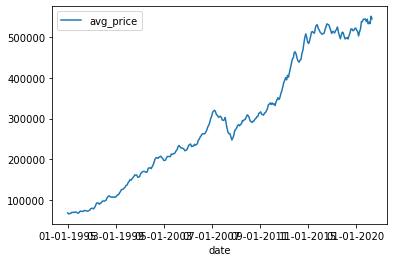

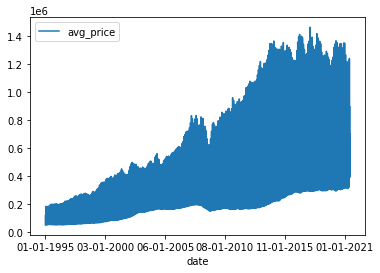

In [457]:
barnet = properties_isol2[properties_isol2['borough'] == 'Lambeth']
barnet_graph = barnet.plot(x='date', y='avg_price', kind='line')


all_graph = properties_isol2.plot(x='date', y='avg_price', kind='line')

To limit the number of data points you have, you might want to extract the year from every month value your *Month* column. 

To this end, you *could* apply a ***lambda function***. Your logic could work as follows:
1. look through the `Month` column
2. extract the year from each individual value in that column 
3. store that corresponding year as separate column. 

Whether you go ahead with this is up to you. Just so long as you answer our initial brief: which boroughs of London have seen the greatest house price increase, on average, over the past two decades? 

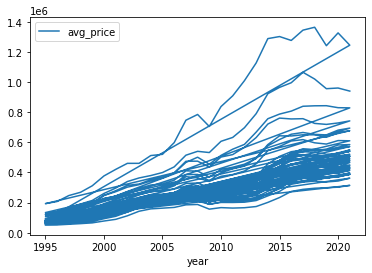

In [469]:
all_graph = properties_final.plot(x='year', y='avg_price', kind='line')

**3. Modeling**

Consider creating a function that will calculate a ratio of house prices, comparing the price of a house in 2018 to the price in 1998.

Consider calling this function create_price_ratio.

You'd want this function to:
1. Take a filter of dfg, specifically where this filter constrains the London_Borough, as an argument. For example, one admissible argument should be: dfg[dfg['London_Borough']=='Camden'].
2. Get the Average Price for that Borough, for the years 1998 and 2018.
4. Calculate the ratio of the Average Price for 1998 divided by the Average Price for 2018.
5. Return that ratio.

Once you've written this function, you ultimately want to use it to iterate through all the unique London_Boroughs and work out the ratio capturing the difference of house prices between 1998 and 2018.

Bear in mind: you don't have to write a function like this if you don't want to. If you can solve the brief otherwise, then great! 

***Hint***: This section should test the skills you acquired in:
- Python Data Science Toolbox - Part One, all modules

In [505]:
def percent(d):
    y1998 = float(d['avg_price'][d['year']==1998])
    y2018 = float(d['avg_price'][d['year']==2018])
    percent_inc = [(y2018-y1998)/y1998*100]
    return percent_inc
print(percent(properties_final[properties_final['borough']=='Hackney']))
percents = {}
for b in properties_final['borough'].unique():
    borough = properties_final[properties_final['borough'] == b]
    percents[b] = percent(borough)
percent_df = pd.DataFrame(percents)    
print(percent_df.head())
properties_percents = percent_df.transpose().reset_index()
properties_percents.rename(columns={'index':'Borough', 0:'%_of_Increase'}, inplace=True)
high_percent_properties = properties_percents.sort_values(by='%_of_Increase',ascending=False).head(10)
print(high_percent_properties)
high_percent_properties.describe()


[519.8285561008662]
   Barking & Dagenham      Barnet      Bexley      Brent     Bromley  \
0          389.661861  335.819592  324.897705  389.45545  309.478469   

       Camden     Croydon     Ealing     Enfield   Greenwich  ...      Merton  \
0  393.535341  320.110028  331.14509  326.347158  376.303635  ...  374.127331   

       Newham   Redbridge  Richmond upon Thames  Southwark      Sutton  \
0  430.539044  347.118201             300.51619  451.64853  311.852261   

   Tower Hamlets  Waltham Forest  Wandsworth  Westminster  
0     362.670104      483.475581  375.770935   435.356539  

[1 rows x 32 columns]
                 Borough  %_of_Increase
10               Hackney     519.828556
29        Waltham Forest     483.475581
26             Southwark     451.648530
21              Lewisham     444.922104
31           Westminster     435.356539
23                Newham     430.539044
12              Haringey     413.462496
18  Kensington & Chelsea     408.246507
20               Lam

,%_of_Increase
count,10.000000
mean,437.678981
std,39.870859
min,393.535341
25%,409.550504
50%,432.947791
75%,449.966924
max,519.828556


### 4. Conclusion
What can you conclude? Type out your conclusion below. 

Look back at your notebook. Think about how you might summarize what you have done, and prepare a quick presentation on it to your mentor at your next meeting. 

We hope you enjoyed this practical project. It should have consolidated your data hygiene and pandas skills by looking at a real-world problem involving just the kind of dataset you might encounter as a budding data scientist. Congratulations, and looking forward to seeing you at the next step in the course! 

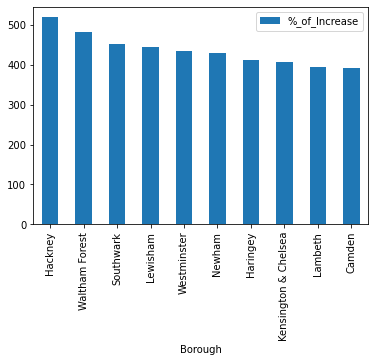

In [504]:
# Over the past 20 years, average housing prices in some London Boroughs have increased by as much as 500%. The chart below
#     depicts the Top 10 boroughs by percentage increase. The average 20-year increase was 438% between 1998 and 2018.
high_percent_graph = high_percent_properties.plot(x='Borough', y='%_of_Increase', kind='bar')